Import Pacakages

In [3]:
!pip install easyocr
!pip install imutils

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.5.1 requires Cython, which is not installed.
tf-models-official 2.5.1 requires gin-config, which is not installed.
tf-models-official 2.5.1 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.1 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.1 requires oauth2client, which is not installed.
tf-models-official 2.5.1 requires opencv-python-headless, whic

  Using cached PyYAML-5.4.1-cp39-cp39-win_amd64.whl (213 kB)
  Using cached matplotlib-3.4.2-cp39-cp39-win_amd64.whl (7.1 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)



lvis 0.5.3 requires Cython>=0.29.12, which is not installed.


  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=7206a189b7d037a8e237995848d93787ba729ca7472e8b4b283e88937f6c2e5e
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

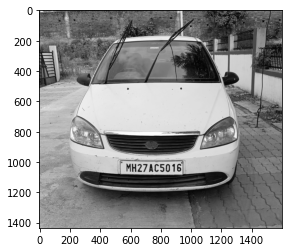

In [3]:
img =cv2.imread('./image6.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

APPLY FILTERING and FIND EDGE FOR LOCALIZATON

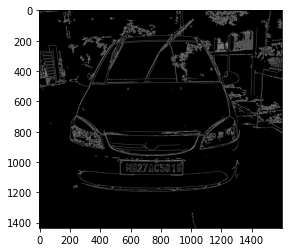

In [5]:
bfilter = cv2.bilateralFilter(gray,40,40,40) # Noise Reduction
edged = cv2.Canny(bfilter,40,200) # Edge Detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

FIND CONTOURS AND APPLY MASK

In [6]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse=True)[0:30]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [8]:
location

array([[[ 535,  997]],

       [[ 545, 1081]],

       [[ 944, 1079]],

       [[ 942,  994]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

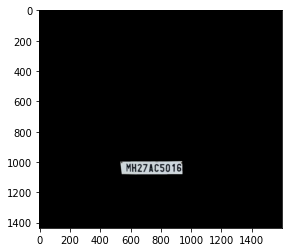

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image= gray[x1:x2+1,y1:y2+1]

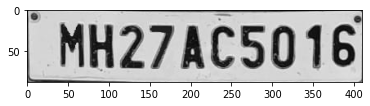

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

USE EASY OCR To READ TEXT

In [13]:
reader = easyocr.Reader(['en'])
results = reader.readtext(cropped_image)
results

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\Asus\Desktop\Works\Opencv\Opecv personal\Object\TFODCourse\anprsys\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[30, 6], [410, 6], [410, 82], [30, 82]], 'Mh27ac5016', 0.42704581959330346)]

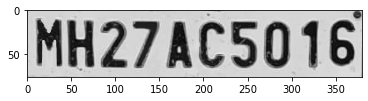

In [21]:
crop_image = cropped_image[6:82,30:410]
plt.imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))

In [22]:
text = results[0][1].upper()

In [23]:
text

'MH27AC5016'